For the following code, there are 4 employment state. All variables can be adjusted to accomodate different circumstances.

Optimal policy:
[True, True, True, True]
Optimal Value Function:
[-32.15311325  -9.97081468  -8.52272501  -7.49528904  -6.69834779]


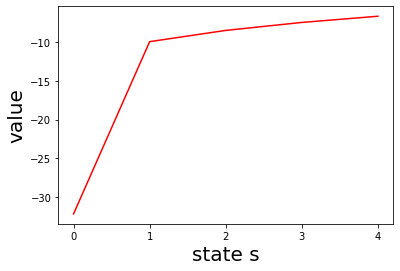

In [ ]:
import numpy as np
## plan via policy iteration
alpha = 0.2
n = 5 # total number of states including the unemployment state

# prob: define transition probability at unemployment state pi
prob = np.array([0, 0.1,    0.2,      0.3,     0.4])

# initialize transition probability matrix. The first row is initialized to 0
trans_prob = np.array([[0,        0,       0,        0,       0],
                       [alpha, 1-alpha,   0,        0,       0],
                       [alpha,   0,    1-alpha,     0,       0],
                       [alpha,   0,       0,      1-alpha,   0],
                       [alpha,   0,       0,        0,    1-alpha],])

# wages and log wages
wages = np.array([10,20,30,40,50])
R_ini = np.array([np.log(wages[0]),np.log(wages[1]),np.log(wages[2]),\
                  np.log(wages[3]),np.log(wages[4])])
discount = 0.9
num_iters = 1000

# construct a list of all possible actions
# ex. 3 employment states action list = 
# [[True, True, True],
#  [True, True, False],
#  [True, False, True],
#  [True, False, False],
#  [False, True, True],
#  [False, True, False],
#  [False, False, True],
#  [False, False, False]]
def getAList(N):
  res = []
  def helper(x, curr):
    if x <=0:
      res.append(curr.copy())
      return
    helper(x-1, curr+ [True])
    helper(x-1, curr+ [False])
  helper(N, [])
  return res
action_list = getAList(n-1)

# initialize policy to always declining the offer
policy = action_list[-1]
V_list = []
for iter in range(num_iters):
  # compute value function
  transition_matrix = trans_prob
  R0 = 0
  for i in range(1, n):
    a = policy[i-1]
    if a:
      # if accept the offer:
      transition_matrix[0, i] = prob[i]
      R0 +=prob[i]*np.log(wages[i])
    else:
      # if decline the offer:
      transition_matrix[0, i] = 0
      transition_matrix[0, 0] += prob[i]
      R0 += prob[i]*np.log(wages[0])
  R = R_ini
  R[0] = R0
  V = np.linalg.solve(np.eye(n) - discount * transition_matrix, R)
  V_list.append(V)

  # compute action value function
  Q = []
  for a in action_list:
    q = 0
    for i in range(n-1):
      if a[i]:
        # if accept the offer:
        q += prob[i+1]*R_ini[i+1]+discount*prob[i+1]*V[i+1]
      else:
        # if decline the offer:
        q += prob[i+1]*R_ini[0]+discount*prob[i+1]*V[0]
    Q.append(q)

  # update policy
  policy = action_list[np.argmax(Q)]

# report optimal policy
print('Optimal policy:')
print(policy)
print('Optimal Value Function:')
print(V_list[-1])

# plot optimal value function
import matplotlib.pyplot as plt
import pylab
N = range(n)
plt.plot(N, V_list[-1], 'red')
# plt.plot(N, V_list[0], 'red')
plt.xticks(N)
plt.xlabel(r'state s', fontsize=20)
plt.ylabel('value', fontsize=20)
plt.show()